In [114]:
#Import libraries
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

#Prompts file name and finds location
def enterName(filterType):
    DataName = input("Enter " + filterType + " data file name: ")
    return DataName

#Function to open files and save data
def getData(link):
    hdu = fits.open(link)
    data = hdu[0].data
    return data

#Function to subtract one dataset from another according to a scale factor mu
def subtractData(data1, data2, mu):
    newData = data1 - (mu*data2)
    return newData

#Calculates and returns skewness using function from paper
def calcSkewness(data):
    skewness = 0 #Temporary
    pixelCount = (len(data)*len(data[0]))
    mean = data.mean()
    std = data.std()
    for row in range(0, len(data)):
        for col in range(0, len(data[0])):
            skewness += ((data[row, col] - mean)/std)**3
    skewness = skewness/(pixelCount-1)
    return skewness

#Calculates most optimal scale constant
def determineBestMu(NBlink, BBlink):
    NBData = getData(NBlink)
    BBData = getData(BBlink)

    bestSkew = 1000000000.0
    bestMu = 1000000000.0
    for mu in np.arange(0.0, 2.0, 0.1):
        subtractedData = subtractData(NBData, BBData, mu)
        currSkew = calcSkewness(subtractedData)
        if abs(currSkew) < abs(bestSkew):
            bestSkew = currSkew
            bestMu = mu
    return bestMu, bestSkew

print("Ensure data files are within data folder")
NBDataName = enterName("NB")
BBDataName = enterName("BB")
NBDataLink = "data/" + NBDataName
BBDataLink = "data/" + BBDataName
filesInFolder = os.listdir("data")

if (NBDataName in filesInFolder) & (BBDataName in filesInFolder):
    print("Files Found")

    optMu, optSkew = determineBestMu(NBDataLink, BBDataLink)

    print("Most optimal scale factor = ", round(optMu, 2))
    print("Most optimal skewness = ", optSkew)
else:
    print("Files of submitted names not detected")

Ensure data files are within data folder
Files Found
Most optimal scale factor =  1.4
Most optimal skewness =  0.1463936251198289


Text(0.5, 1.0, 'Original rim_Ha_wcs.fits Image')

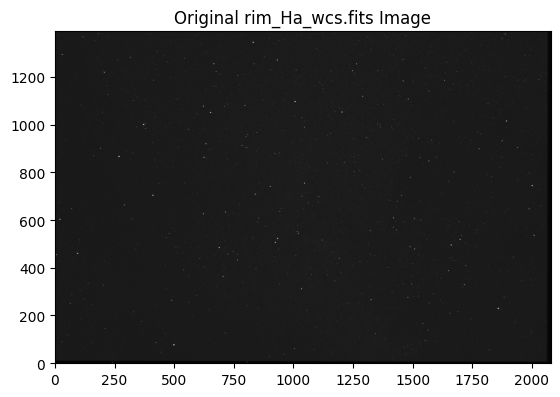

In [116]:
plt.imshow(getData(NBDataLink), origin = 'lower', cmap = 'gray')
plt.title("Original " + NBDataName + " Image")

Text(0.5, 1.0, 'Original rim_R_wcs.fits Image')

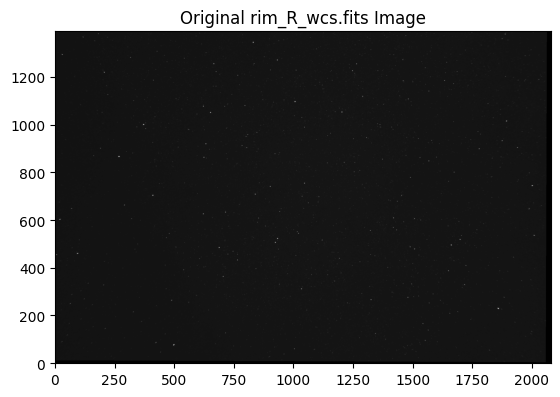

In [117]:
plt.imshow(getData(BBDataLink), origin = 'lower', cmap = 'gray')
plt.title("Original " + BBDataName + " Image")

Text(0.5, 1.0, 'Image with subtracted data')

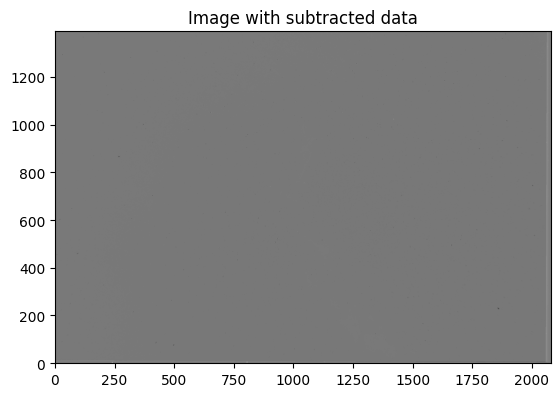

In [118]:
plt.imshow(subtractData(getData(NBDataLink), getData(BBDataLink), optMu), origin = 'lower', cmap = 'gray')
plt.title("Image with subtracted data")